<a href="https://colab.research.google.com/github/1lunga/SpazaForecastActivity/blob/main/SpazaShopForcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Dataset and Display


In [8]:
p="/content/drive/MyDrive/Spaza Monthly Sales.xlsx"
df=pd.read_excel(p)
df.head()

,Date,Sales,Product,Category,Location,Holiday
0,2023-01-01,1000,Dairy,Food,Rural,Yes
1,2023-01-02,1200,Springwater,Baverages,Rural,Yes
2,2023-01-03,1500,kattle,Household,Rural,No
3,2023-01-04,1800,Pie,food,Rural,No
4,2023-01-05,2000,Oros,baverages,Rural,No


Preparing the data


Handle Missing Values

In [9]:
df.isnull().sum()

,0
Date,0
Sales,0
Product,0
Category,0
Location,0
Holiday,0


Check And Remove Duplictes

In [10]:
df.duplicated().sum()

0

Check Missing Values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Date        0
Sales       0
Product     0
Category    0
Location    0
Holiday     0
dtype: int64


Check Anomalies

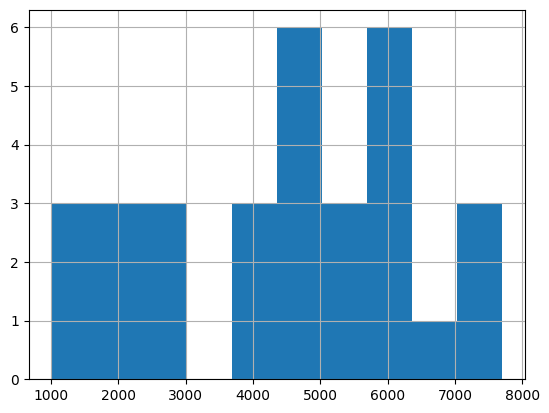

In [12]:
df['Sales'].hist()
plt.show()

Inspect Data

In [13]:
df.dtypes

,0
Date,datetime64[ns]
Sales,int64
Product,object
Category,object
Location,object
Holiday,object


In [14]:
df.columns


Index(['Date', 'Sales', 'Product', 'Category', 'Location', 'Holiday'], dtype='object')

In [15]:
df.size

186

In [16]:
df.shape

(31, 6)

IMPLEMENT PROPHET

In [17]:
from prophet import Prophet

Prepare data

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})


Create Prophet Model

In [19]:
model = Prophet(growth='linear', seasonality_prior_scale=0.1,)

Fit Model

In [20]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa44ekj2f/pnlkr3qq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa44ekj2f/d02vits4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86924', 'data', 'file=/tmp/tmpa44ekj2f/pnlkr3qq.json', 'init=/tmp/tmpa44ekj2f/d02vits4.json', 'output', 'file=/tmp/tmpa44ekj2f/prophet_model9w8ludsh/prophet_model-20240918124730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Make future dataframe

In [21]:
future=model.make_future_dataframe(periods=60)

Generate Forecast

In [22]:
forcast=model.predict(future)

Plot forcast

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


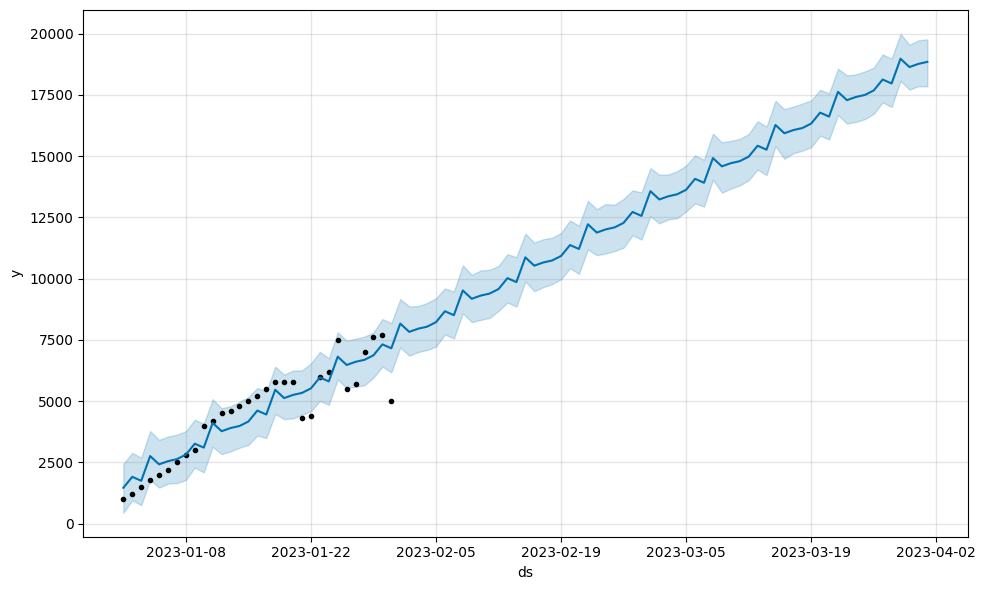

In [23]:
firstModel = model.plot(forcast)
plt.show()

Plot Components

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


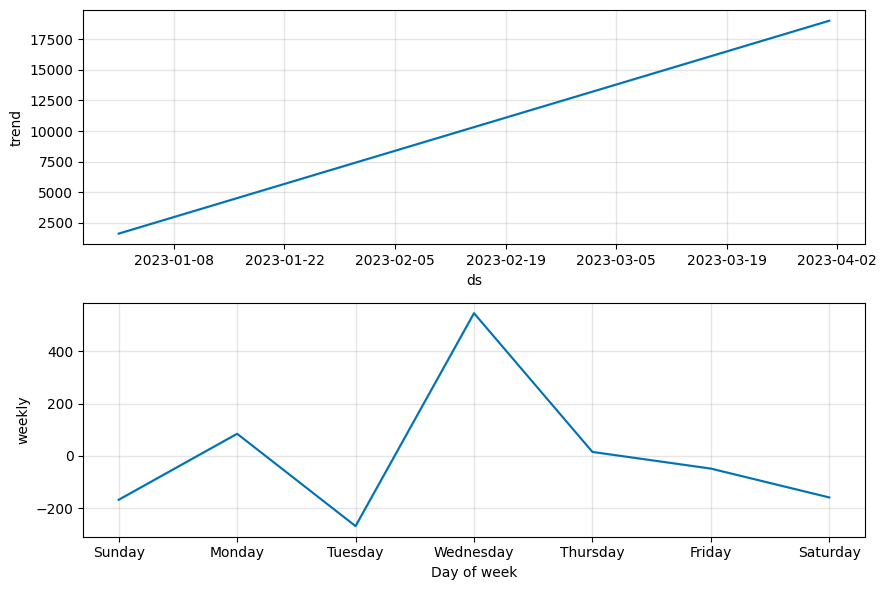

In [24]:
SecondModel = model.plot_components(forcast)
plt.show()

IMPLEMENT ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

Check Stationarity

In [27]:
result = adfuller(df['y'])
print(result)

(-2.289934964874447, 0.17523469689667753, 7, 23, {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}, 337.0999408954729)


Plot ACF and PACF

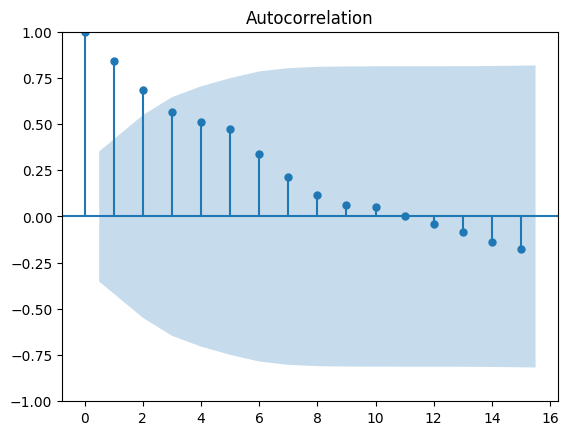

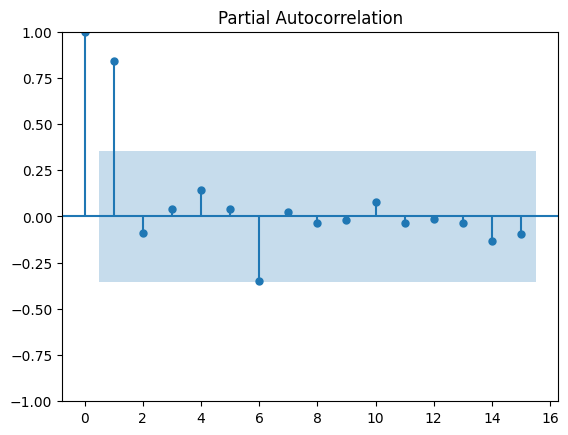

In [28]:
plot_acf(df['y'])
plt.show()
plot_pacf(df['y'])
plt.show()

In [29]:
p = 1
d = 1
q = 1

Create ARIMA model

In [30]:
model = ARIMA(df['y'], order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Fit Model

In [32]:
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -244.801
Date:                Wed, 18 Sep 2024   AIC                            495.601
Time:                        12:53:50   BIC                            499.805
Sample:                    01-01-2023   HQIC                           496.946
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4442      1.917      0.232      0.817      -3.313       4.201
ma.L1         -0.5841      1.775     -0.329      0.742      -4.064       2.896
sigma2      7.238e+05   2.62e+05      2.758      0.0

Generate Forecast

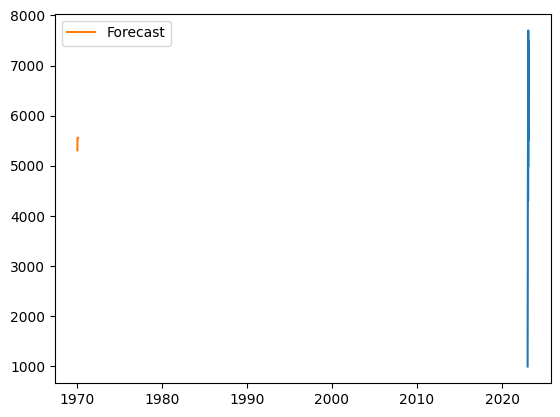

In [39]:
forecast = model_fit.forecast(steps=30)
plt.plot(df['y'])
plt.plot([None for i in df['y']]+[x for x in forecast], label = 'Forecast')
plt.legend()
plt.show()

IMPLEMENT LSTM

In [50]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

Scale Data

In [51]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['y']])

Split Data

In [52]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

Training Data

In [53]:
def create_trainData(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_trainData(train_data, window_size)

LSTM Model

In [60]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Model